# Bar chart

Bar charts are figures that visualize a specific data measurement (e.g., count, mean, median, etc) stratified by categories. In a bar chart, there is one bar for each class, and the height of the bar represents the magnitude of the measurement in the class. An example of bar charts is as below with the bars represent the counts of people in each class of opinion.

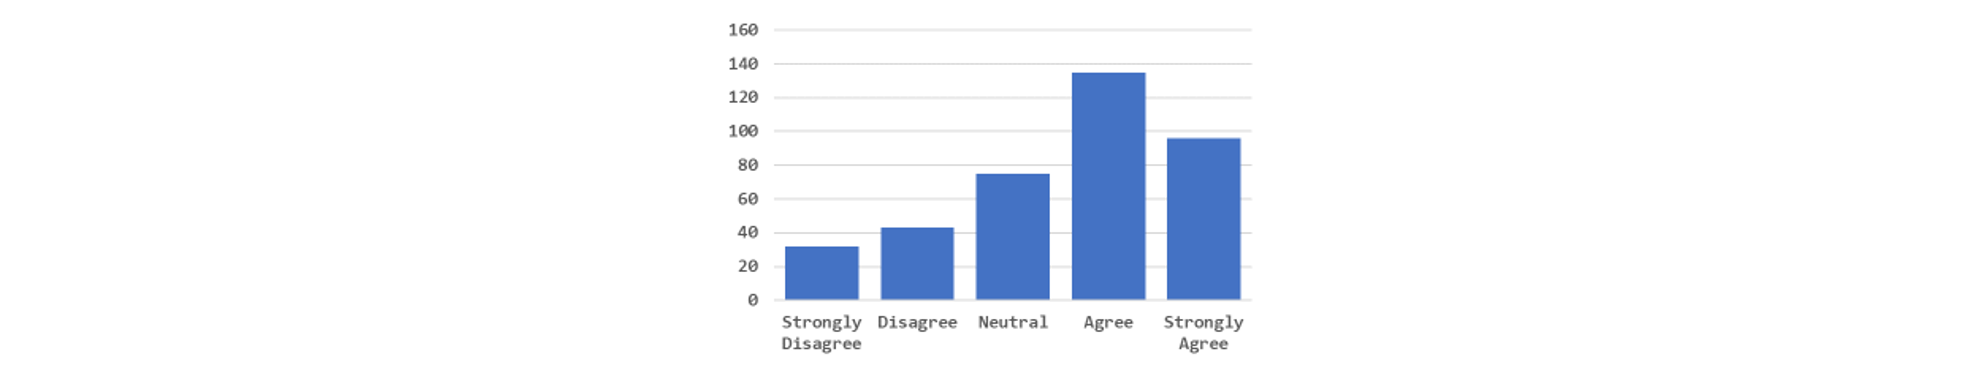

## Loading data

I will use a subset of the Adult data (https://archive.ics.uci.edu/ml/datasets/Adult) for demonstration. I also did some minor processing so we can focus on visualization.

In [1]:
import pandas as pd

data = pd.read_csv('adult.csv')
data.head(2)

,age,workclass,education,maritalstatus,occupation,workhours,income
0,39,State-gov,Bachelors,Single,Administrative,40,Below-50K
1,50,Self-emp,Bachelors,Married,Management,13,Below-50K


### Using matplotlib

Matplotlib provides the `pyplot.bar()` function to draw a bar chart. At minimum, we need to provide two inputs: a list of categories, and their corresponding measurements. For example

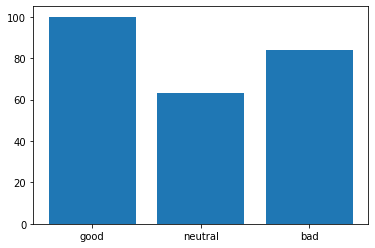

In [2]:
import matplotlib.pyplot as plt

#categories
cats = ['good', 'neutral', 'bad']
#measurements
counts = [100, 63, 84]

#draw bar chart
plt.bar(cats,counts)
plt.show()

In reality though, we rarely receive data in the categories-measurements format. Instead, we usually need to derive them from a data set, so let's see how to do that.

### Bar chart for aggregated measurements

Almost all aggregated measurements like `mean` and `median` can be obtained using pandas `groupby()`. First, we slice to the columns of interest which is then grouped by the stratifying column. Finally, we call the aggregation function.

For example, to draw a bar chart of average age by workclass:

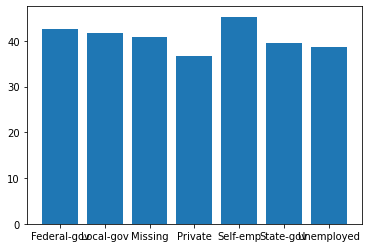

In [3]:
column = 'age'
category = 'workclass'

#get mean of column by category
agg_table = data[[column, category]].groupby(category).mean()
#draw bar chart
plt.bar(agg_table.index,agg_table[column])
plt.show()

It is very common for category labels to be too long and overlap each other in the chart. There are a few things we can do:
- increase the width of the chart
- rotate the xticks labels

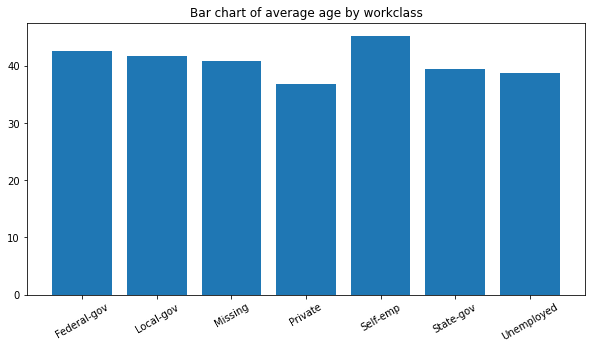

In [4]:
column = 'age'
category = 'workclass'
title = 'Bar chart of average age by workclass'

#get mean of column by category
agg_table = data[[column, category]].groupby(category).mean()
#draw bar chart
plt.figure(figsize=(10,5))
plt.bar(agg_table.index,agg_table[column])
plt.xticks(rotation=30)
plt.title(title)
plt.show()

We can add more options to improve presentation

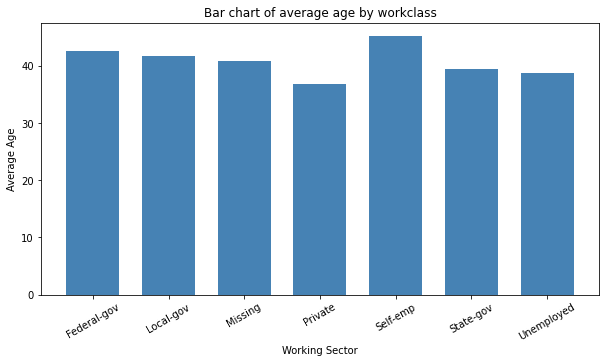

In [5]:
column = 'age'
category = 'workclass'
title = 'Bar chart of average age by workclass'

#get mean of column by category
agg_table = data[[column, category]].groupby(category).mean()
#draw bar chart
plt.figure(figsize=(10,5))
plt.bar(agg_table.index,agg_table[column], width=0.7, color='steelblue')
plt.xlabel('Working Sector')
plt.ylabel('Average Age')
plt.title(title)
plt.xticks(rotation=30)
plt.show()

For other measurement, we can simply change the aggregated function. Pandas provide a lot of them, such as `median()`, `var()`, `sum()`, etc. Below is an example with `median`

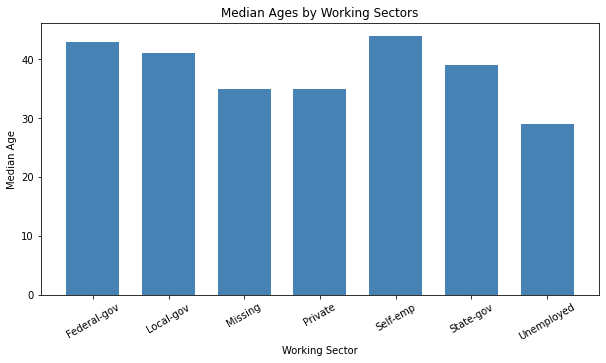

In [6]:
column = 'age'
category = 'workclass'
title = 'Median Ages by Working Sectors'

#get mean of column by category
agg_table = data[[column, category]].groupby(category).median()
#draw bar chart
plt.figure(figsize=(10,5))
plt.bar(agg_table.index,agg_table[column], width=0.7, color='steelblue')
plt.xlabel('Working Sector')
plt.ylabel('Median Age')
plt.title(title)
plt.xticks(rotation=30)
plt.show()

A very common usage of bar charts is to visualize frequencies of categories. We can use `value_counts()` on the categorical column of interests to obtain its frequency table.

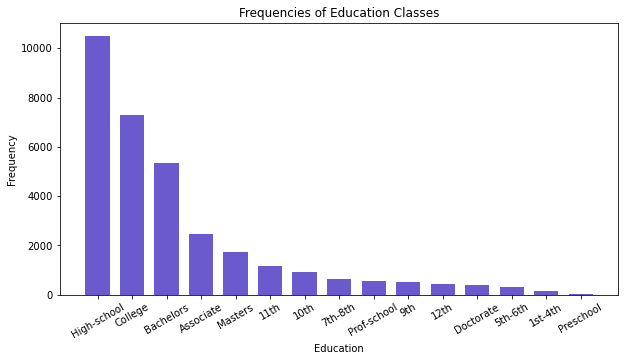

In [7]:
#select column
category = 'education'
title = 'Frequencies of Education Classes'

#get frequency table
freq_table = data[category].value_counts()
#draw bar chart
plt.figure(figsize=(10,5))
plt.bar(freq_table.index,freq_table, width=0.7, color='slateblue')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title(title)
plt.xticks(rotation=30)
plt.show()

Regardless of adjustments, a bar chart starts looking not as nice once it has too many categories. One simple way to fix that is to use a horizontal bar chart instead with `pyplot.barh()`

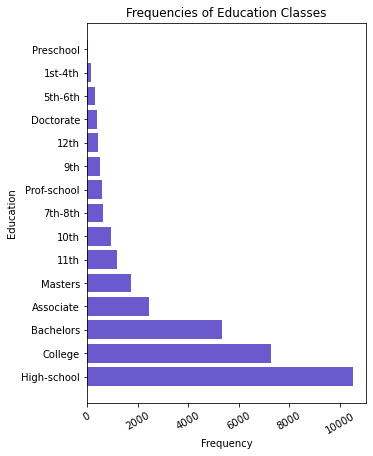

In [8]:
#select column
category = 'education'
title = 'Frequencies of Education Classes'

#get frequency table
freq_table = data[category].value_counts()
#draw bar chart
plt.figure(figsize=(5,7))
plt.barh(freq_table.index,freq_table, color='slateblue')
plt.xlabel('Frequency')
plt.ylabel('Education')
plt.title(title)
plt.xticks(rotation=30)
plt.show()

We can write a loop to draw a bar chart for all categorical columns' frequencies

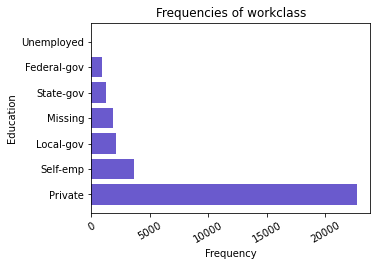

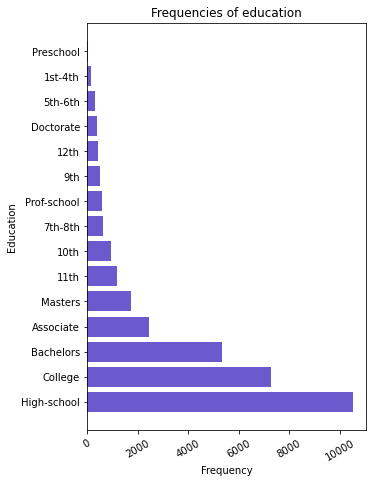

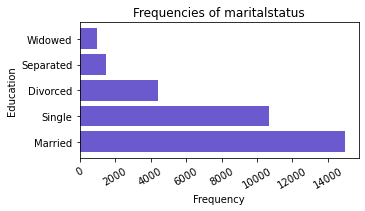

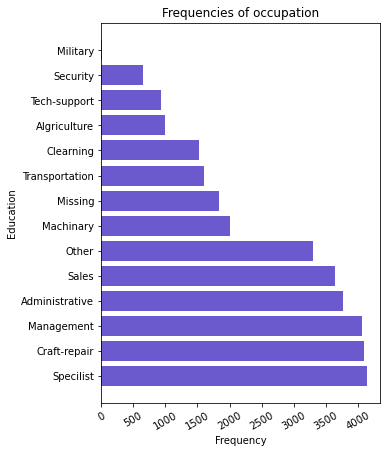

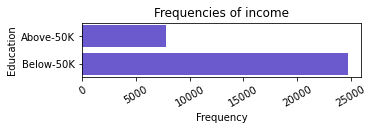

In [9]:
cat_cols = ['workclass','education','maritalstatus','occupation','income']

for category in cat_cols:
    #get frequency table
    freq_table = data[category].value_counts()
    #draw bar chart
    plt.figure(figsize=(5,len(freq_table)*0.5))
    plt.barh(freq_table.index,freq_table, color='slateblue')
    plt.xlabel('Frequency')
    plt.ylabel('Education')
    plt.title('Frequencies of ' + category)
    plt.xticks(rotation=30)
    plt.show()

### Using pandas

Using pandas is a bit quicker. We can directly call `plot.bar()` from the resulted aggregated table or frequency table. However, the code can get quite complicated with too many chained function calls. So, I still recommend to split the codes into multiple parts

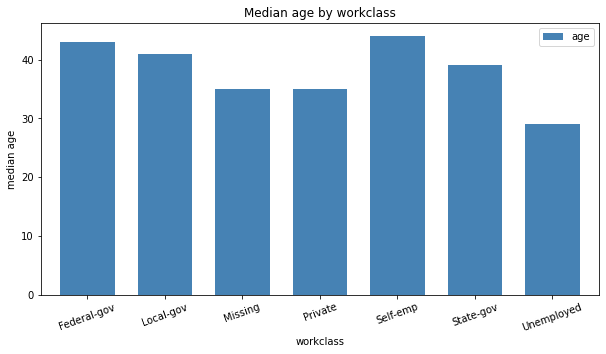

In [10]:
column = 'age'
category = 'workclass'
title = 'Median age by workclass'

agg_table = data[[column, category]].groupby(category).median()
agg_table.plot.bar(figsize=(10,5), 
                   rot=20, 
                   width=0.7, 
                   color='steelblue',
                   ylabel='median age',
                   title=title
                  )
plt.show()

Similarly, we can use `barh()` instead of `bar()` to draw a horizontal bar chart

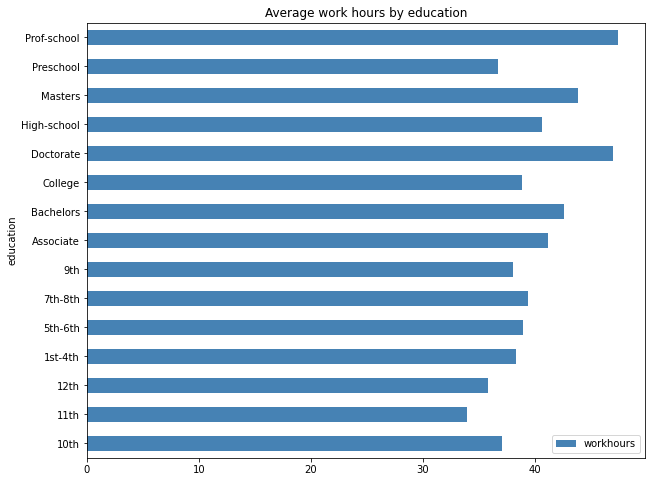

In [11]:
column = 'workhours'
category = 'education'
title='Average work hours by education'

agg_table = data[[column, category]].groupby(category).mean()
agg_table.plot.barh(figsize=(10,8), 
                   color='steelblue',
                   title=title
                  )
plt.show()

For frequency table, we can call `plot.bar()` right after `value_counts()` to draw a bar chart for the column. Like before, we need to write a loop to apply this process to all categorical columns.

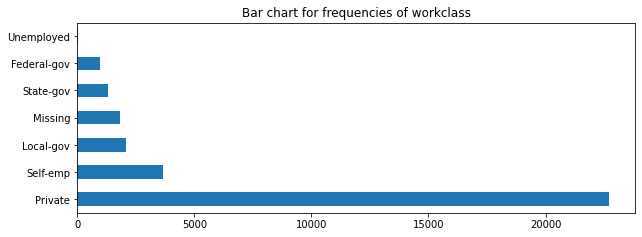

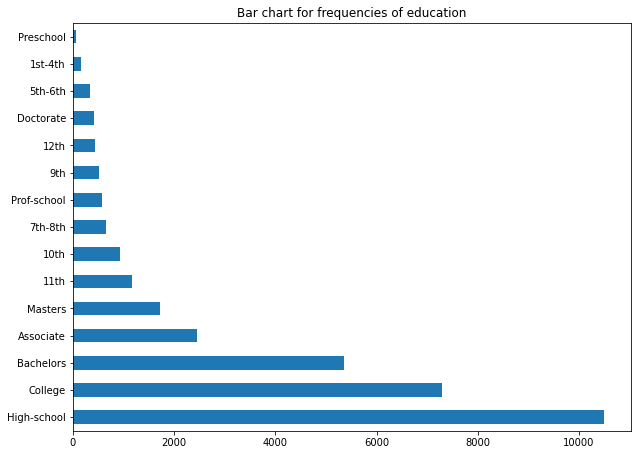

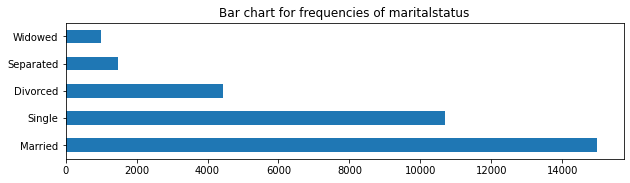

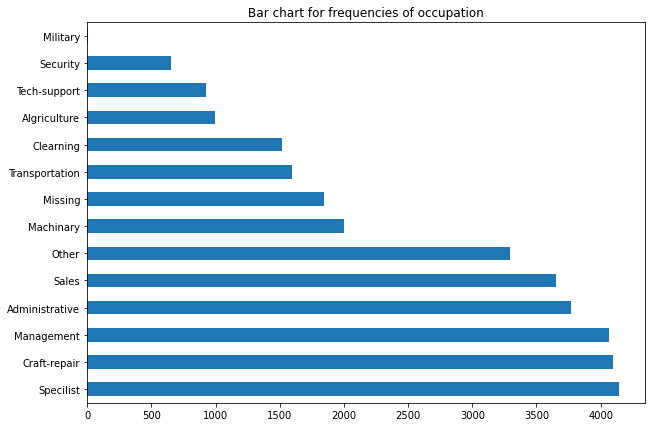

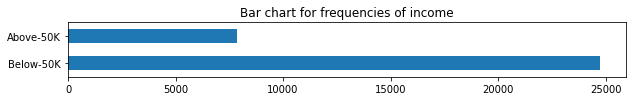

In [12]:
for col in cat_cols:
    freq_table = data[col].value_counts()
    plt.figure(figsize = (10,len(freq_table)*0.5))
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()

### In seaborn

Seaborn splits the bar chart into two types: barplot for aggregated measurements, and countplot for frequencies. By default, barplot calculate the mean. We need to provide the dataframe, the column of interests and the category as `x` and `y` (their order decides if the chart is vertical or horizontal). 

Without any changes, the error estimation is showed for each bar. We can hide them with `errorbar=None`

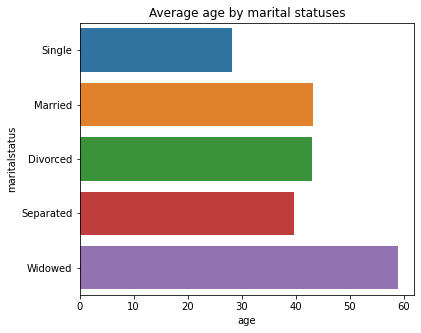

In [12]:
import seaborn as sn

column = 'age'
category = 'maritalstatus'
title='Average age by marital statuses'

plt.figure(figsize=(6,5))
sn.barplot(data, x=column, y=category,errorbar=None)
plt.title(title)
plt.show()

The aggregated measurement can be changed with estimator

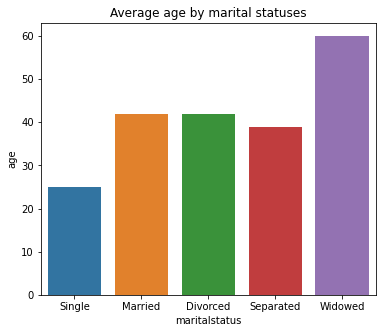

In [13]:
column = 'age'
category = 'maritalstatus'
estimator = 'median'
title='Average age by marital statuses'

plt.figure(figsize=(6,5))
sn.barplot(data, x=category, y=column, estimator=estimator, errorbar=None)
plt.title(title)
plt.show()

Like discussed, we use `countplot()` for bar chart on frequency. We can provide the column with either `x` or `y` for the plot to be vertical or horizontal

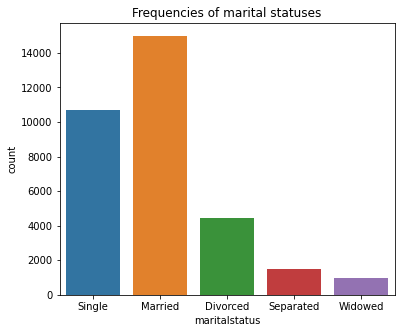

In [15]:
plt.figure(figsize=(6,5))
sn.countplot(data, x='maritalstatus')
plt.title('Frequencies of marital statuses')
plt.show()

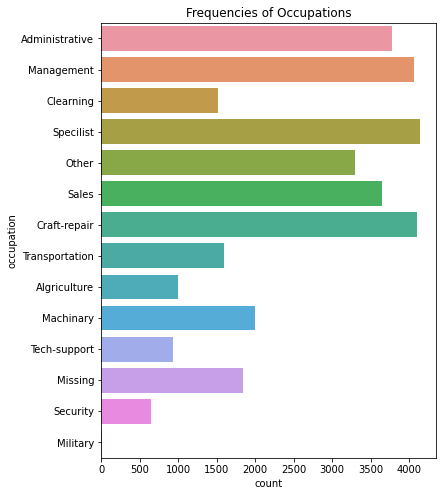

In [16]:
plt.figure(figsize=(6,8))
sn.countplot(data, y='occupation')
plt.title('Frequencies of Occupations')
plt.show()

## Grouped bar charts

Bar charts can visualize multiple measurements by putting their bars side-by-side

### Multiple measurements

This is done only easily in Pandas. The other two libraries are quite a bit more complicated, so let's skip them.

To plot the same measurement for multiple columns, we can slice to all the columns of interests, `groupby()` with the categorical column, then use the aggregation function.

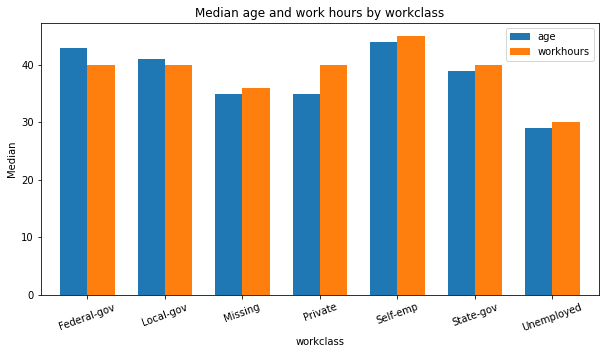

In [14]:
columns = ['age','workhours']
category = 'workclass'
title='Median age and work hours by workclass'

agg_table = data[columns+[category]].groupby(category).median()
agg_table.plot.bar(figsize=(10,5), 
                   rot=20, 
                   width=0.7, 
                   ylabel='Median',
                   title=title
                  )
plt.show()

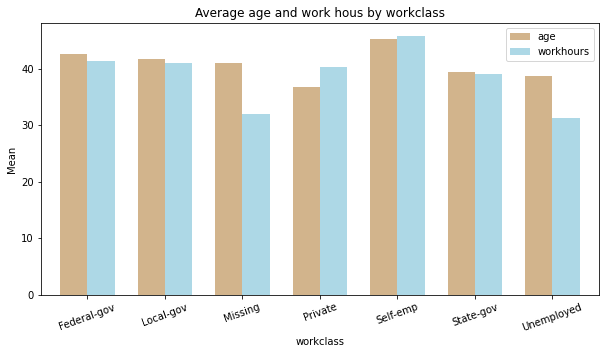

In [15]:
columns = ['age','workhours']
category = 'workclass'
title='Average age and work hous by workclass'

agg_table = data[columns+[category]].groupby(category).mean()
agg_table.plot.bar(figsize=(10,5), 
                   rot=20, 
                   color=['tan','lightblue'],
                   width=0.7, 
                   ylabel='Mean',
                   title=title
                  )
plt.show()

To draw multiple measurements of the same column, we can utilize the describe function for pandas dataframe. Like previously, we slice to the columns of interests then `groupby(category)`. However, this time, we use `describe()` as the aggregation function.

By default, `describe()` returns several descriptive statistics. We can slice to the ones we need to avoid unnecessary components in the bar chart.

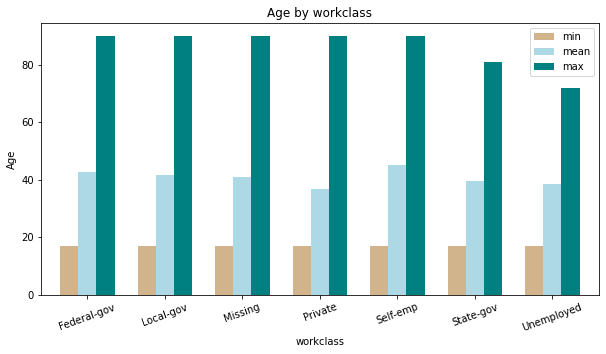

In [16]:
column = 'age'
category = 'workclass'
title='Age by workclass'

measurements = ['min','mean','max']
agg_table = data[[column,category]].groupby(category).describe()[column][measurements]
agg_table.plot.bar(figsize=(10,5), 
                   rot=20, 
                   color=['tan','lightblue','teal'],
                   width=0.7, 
                   ylabel='Age',
                   title=title)
plt.show()

Multiple measurements from multiple columns can become quite complicated. We still use `describe()`, however, the aggregation result is now a multi-index dataframe. So, we need to use the `MultiIndex.from_product()` function to generate the correct index systems for slicing

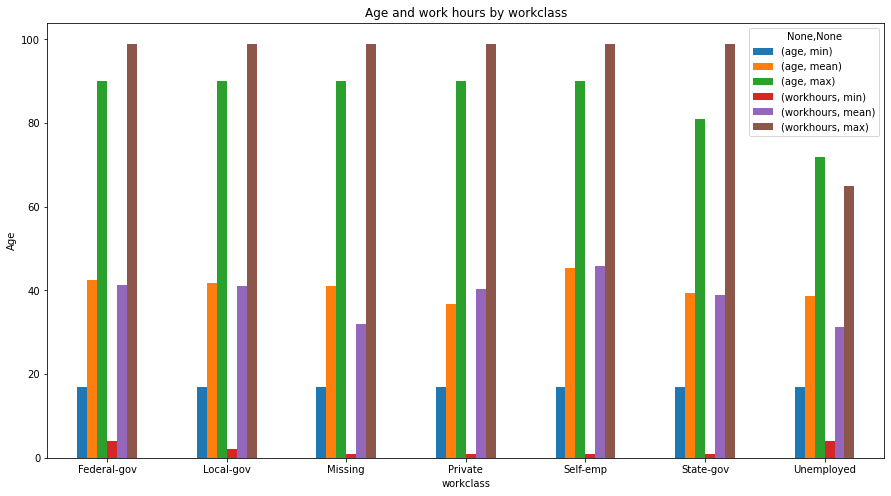

In [17]:
columns = ['age','workhours']
category = 'workclass'
measurements = ['min','mean','max']
title='Age and work hours by workclass'

import itertools
indexes = pd.MultiIndex.from_product([columns, measurements], names=["column", "measure"])
agg_table = data[columns+[category]].groupby(category).describe()[indexes]
agg_table.plot.bar(figsize=(15,8), 
                   rot=0, 
                   width=0.5, 
                   ylabel='Age',
                   title=title)
plt.show()

### Multiple groups

We can add more groupings to a bar chart, however, it becomes difficult to read very fast. So, I recommend at most two types of groupings. 

Draw this chart in pandas is fairly similar to before with slicing, `groupby()`, then aggregating. One new thing to do is that we have to `unstack()` the aggregation table to get the correct index system

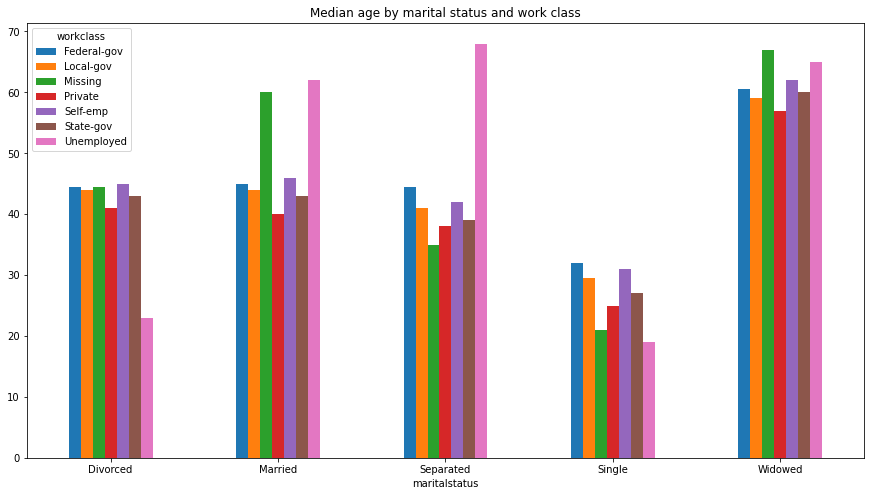

In [18]:
column = 'age'
categories = ['maritalstatus','workclass']
title='Median age by marital status and work class'

agg_table = data[[column]+categories].groupby(categories).median()
agg_table.unstack()[column].plot.bar(
    figsize=(15,8),
    rot=0,
    title=title
)

plt.show()

In seaborn, this plot is quite easier to do. We can add the second grouping with `hue=`

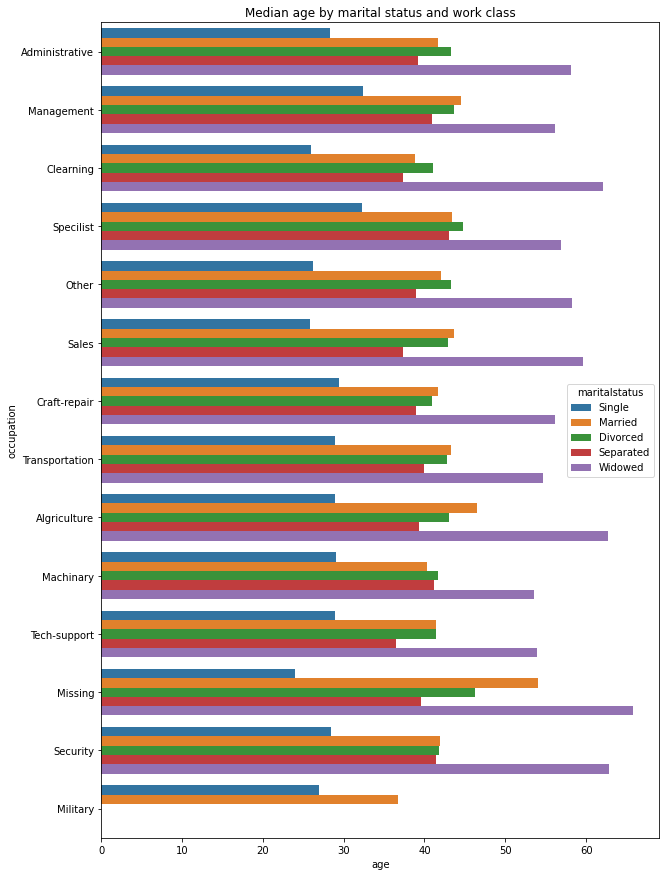

In [19]:
column = 'age'
axis_category = 'occupation'
color_category ='maritalstatus'
title='Median age by marital status and work class'

plt.figure(figsize=(10,15))
sn.barplot(data, x=column, y=axis_category, hue=color_category, errorbar=None)
plt.title(title)
plt.show()

### Stacked bar chart

Usually use for frequency, a stacked bar chart and a 100% stacked bar chart show the different in distributions of a categorical column stratified by another one. The former embeds the number of instances in each stratified class into the bars’ heights whereas the latter scales to 100% and shows proportions instead of frequencies.

We can use the `crosstab()` function for a contingency table before calling `plot.bar(stacked=True)` to draw the chart

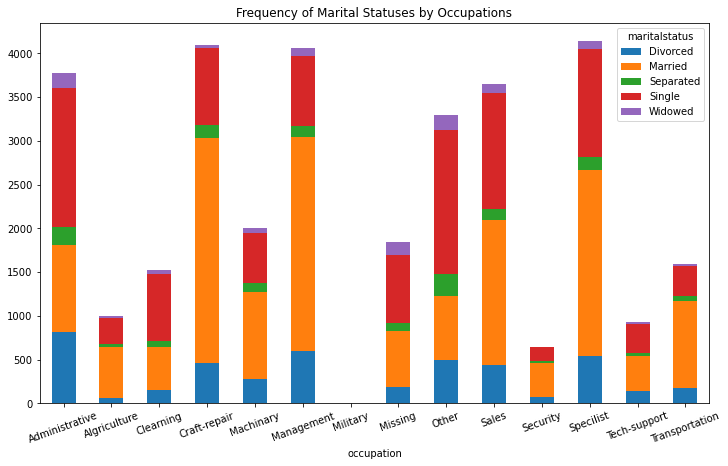

In [20]:
category_1 = 'occupation'
category_2 = 'maritalstatus'
title='Frequency of Marital Statuses by Occupations'

crosstab = pd.crosstab(data[category_1],data[category_2])
crosstab.plot.bar(
    stacked='True', 
    rot=20, 
    figsize=(12,7))
plt.title(title)
plt.show()

To compare distributions, we can use proportions of classes with the 100% stacked bar chart. Drawing this one is a bit more complicated because we have to manually calculate the proportion of each subclass.

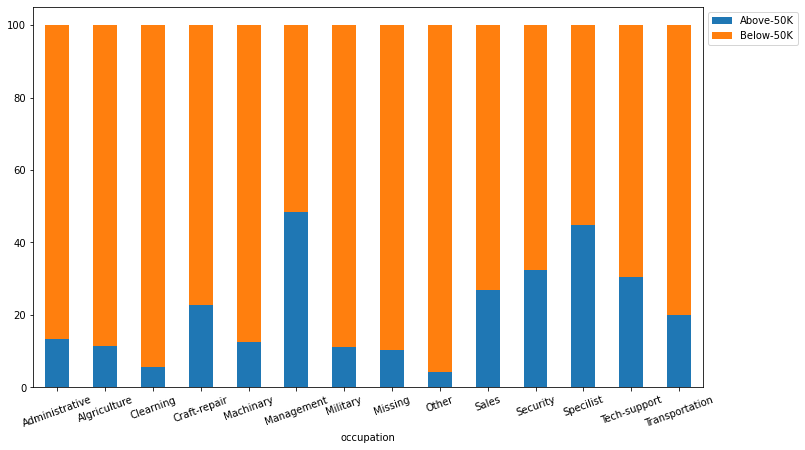

In [21]:
category_1 = 'income'
category_2 = 'occupation'
title='Proportion of Income Groups by Occupations'

crosstab = pd.crosstab(data[category_1],data[category_2])
crosstab = crosstab / crosstab.sum(axis=0) *100
crosstab.T.plot.bar(
    stacked='True', 
    rot=20, 
    figsize=(12,7))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()